### <center> DAIMOND PRICE PREDICTION


### 
THIS IS A REGRESSION KIND OF PROBLEM IN WHICH WE HAVE TO PREDICT THE PRICE OF DAIMOND

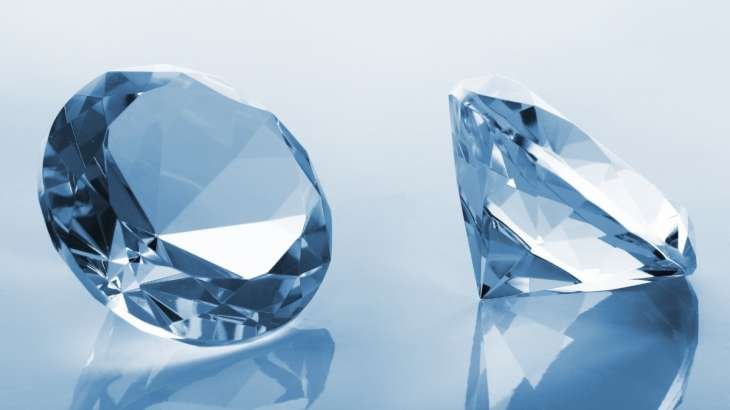

### DATASET DESCRIPTION
  These dataset contain 10 features in which 'Price(in US dollars)' is dependent feature. The goal is we have to predict the price of Diamond using different Regression Algorithms

### 
LOADING NECESSARIES 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import klib as k
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("diamonds.csv")

### EDA

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


### 
removing letter b from cut coloumn

In [4]:
df['cut'] = df['cut'].str.replace('^b','')

In [5]:
df['clarity'] = df['clarity'].str.replace('^b','')
df['color'] = df['color'].str.replace('^b','')

In [6]:
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,'Ideal','E','SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,'Premium','E','SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,'Good','E','VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,'Premium','I','VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,'Good','J','SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,'Ideal','D','SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,'Good','D','SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,'Very Good','D','SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,'Premium','H','SI2',61.0,58.0,2757.0,6.15,6.12,3.74


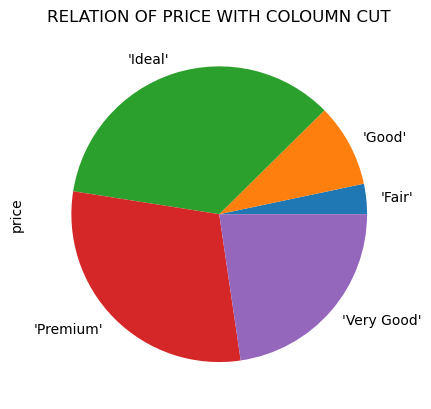

In [8]:
cut_price = df.groupby(['cut'])['price'].sum()
plt.title("RELATION OF PRICE WITH COLOUMN CUT")
cut_price.plot.pie();

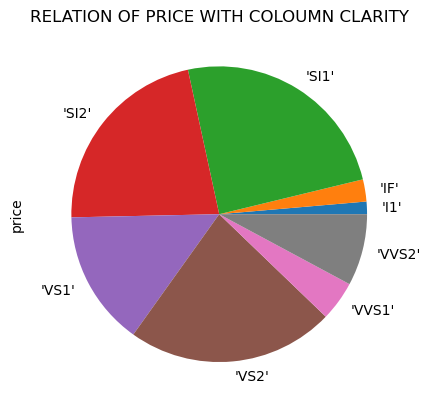

In [9]:
cut_price = df.groupby(['clarity'])['price'].sum()
plt.title("RELATION OF PRICE WITH COLOUMN CLARITY")
cut_price.plot.pie();

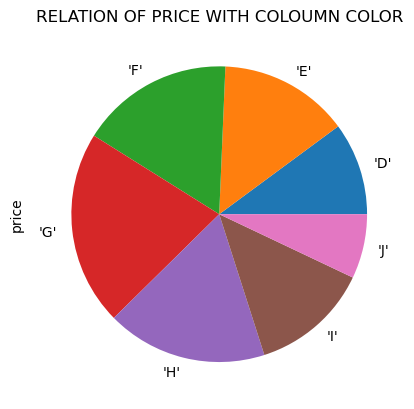

In [10]:
cut_price = df.groupby(['color'])['price'].sum()
plt.title("RELATION OF PRICE WITH COLOUMN COLOR")
cut_price.plot.pie();

In [11]:
df.shape

(53940, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [13]:
df.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
'x'        0.0
'y'        0.0
'z'        0.0
dtype: float64

In [14]:
df.duplicated().sum()

146

In [15]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,'Ideal','E','SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,'Premium','E','SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,'Good','E','VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,'Premium','I','VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,'Good','J','SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,'Ideal','D','SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,'Good','D','SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,'Very Good','D','SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,'Premium','H','SI2',61.0,58.0,2757.0,6.15,6.12,3.74


In [16]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


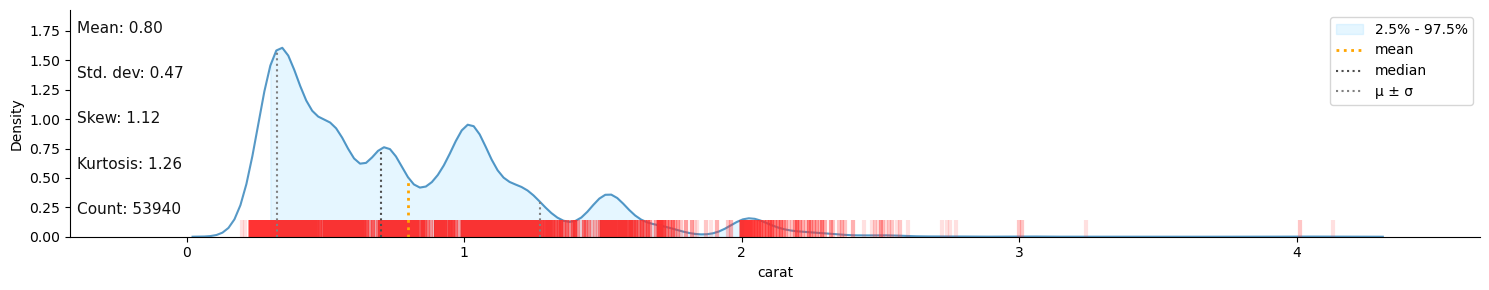

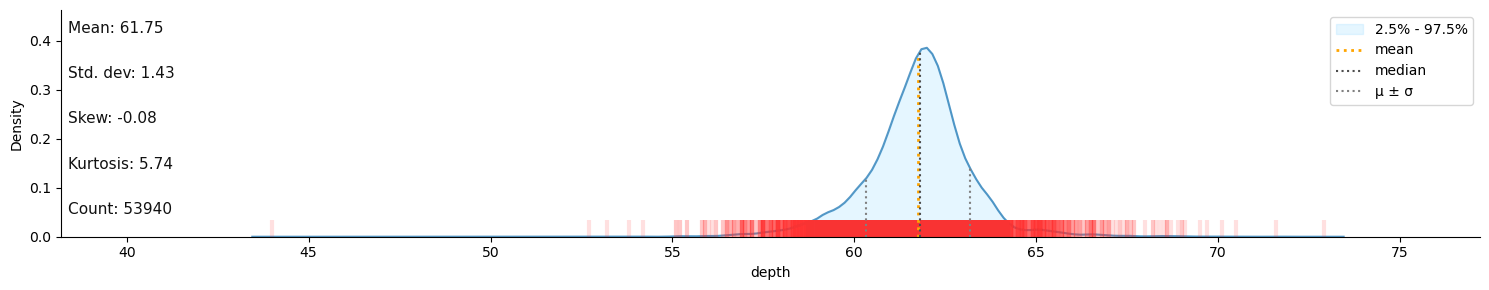

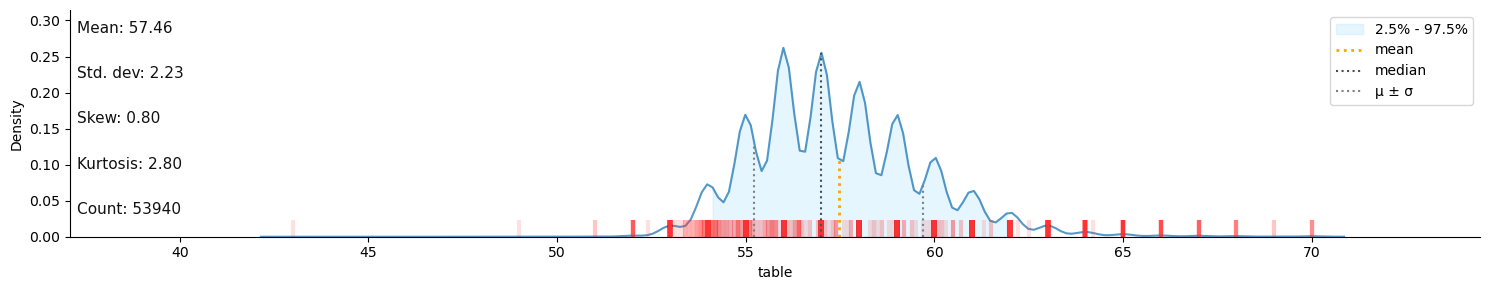

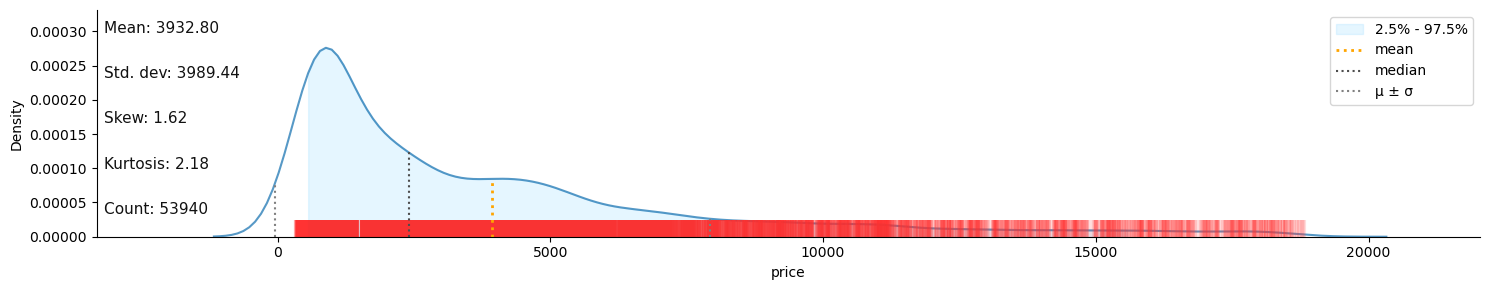

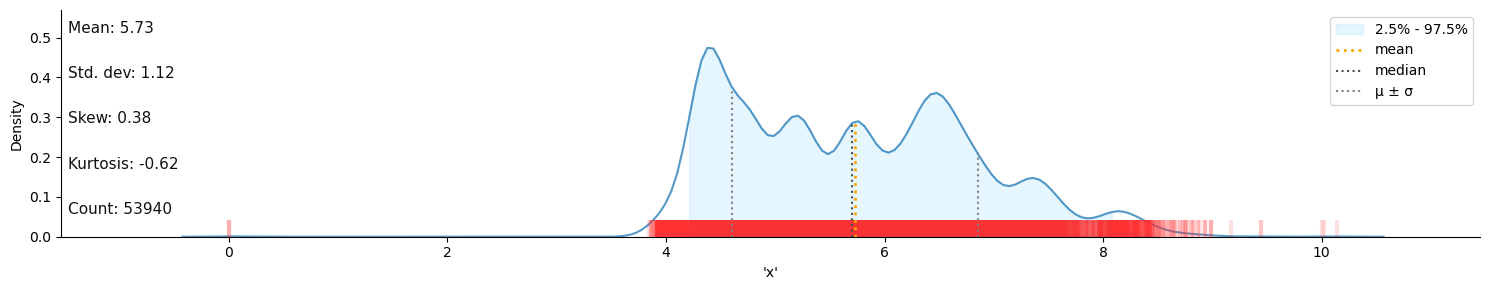

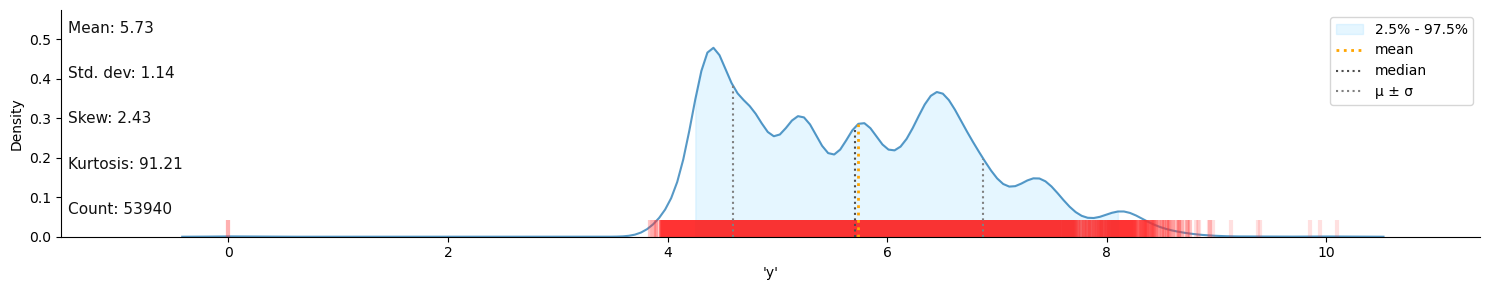

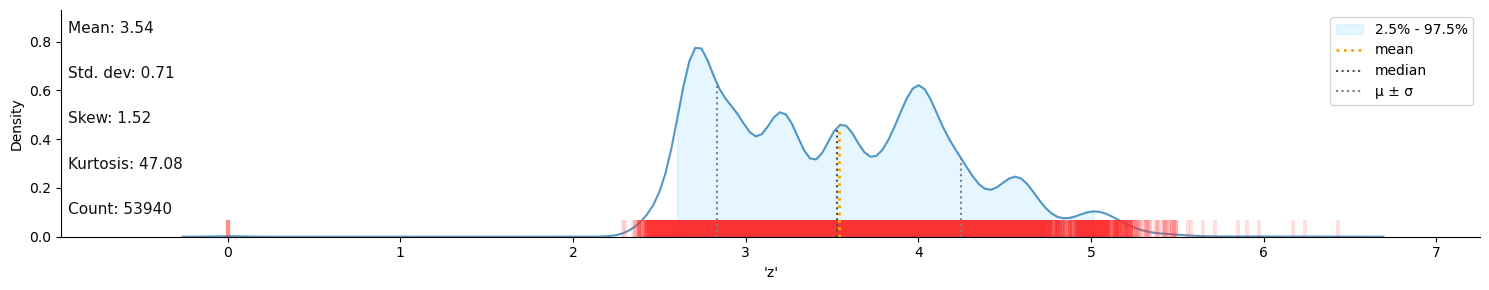

In [17]:
k.dist_plot(df);

In [18]:
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,'Ideal','E','SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,'Premium','E','SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,'Good','E','VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,'Premium','I','VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,'Good','J','SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,'Ideal','D','SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,'Good','D','SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,'Very Good','D','SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,'Premium','H','SI2',61.0,58.0,2757.0,6.15,6.12,3.74


In [19]:
df.cut.unique()

array(["'Ideal'", "'Premium'", "'Good'", "'Very Good'", "'Fair'"],
      dtype=object)

### changing catagorical data to numerical

In [20]:
le=LabelEncoder()

In [21]:
df["cut"]=le.fit_transform(df.cut)

In [22]:
df["color"]=le.fit_transform(df.color)
df["clarity"]=le.fit_transform(df.clarity)

In [23]:
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


### KDA PLOT

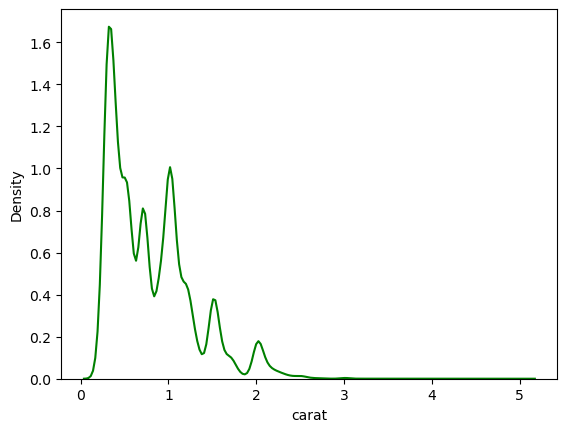

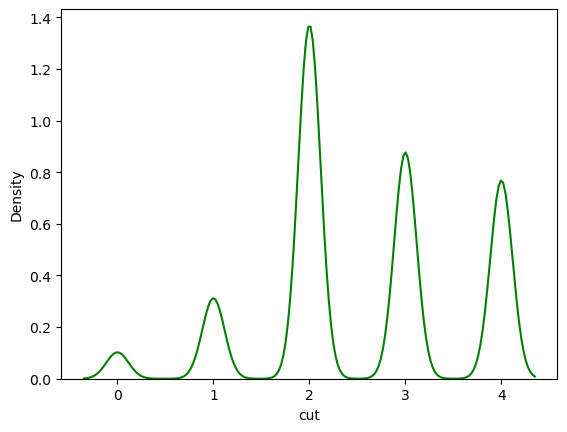

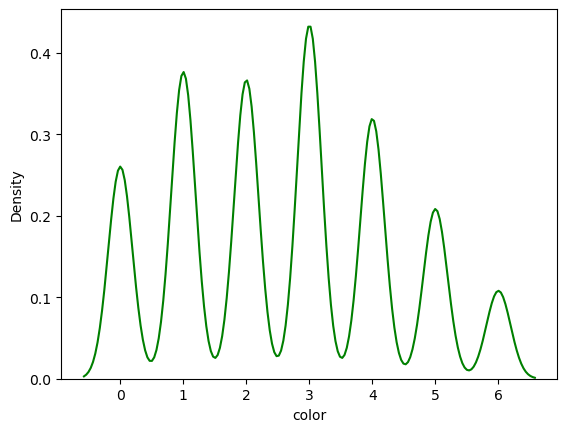

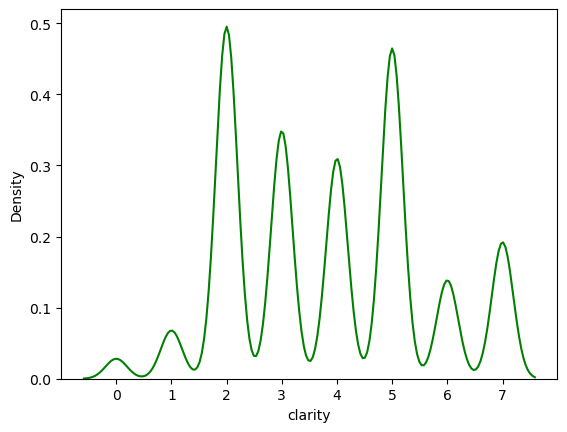

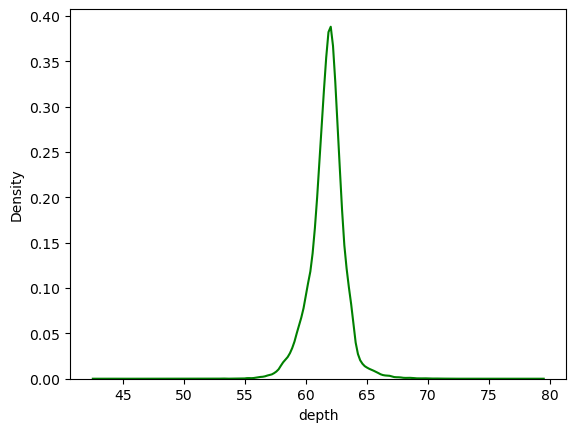

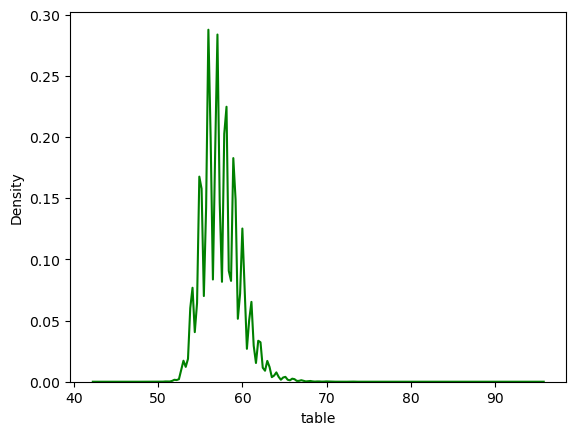

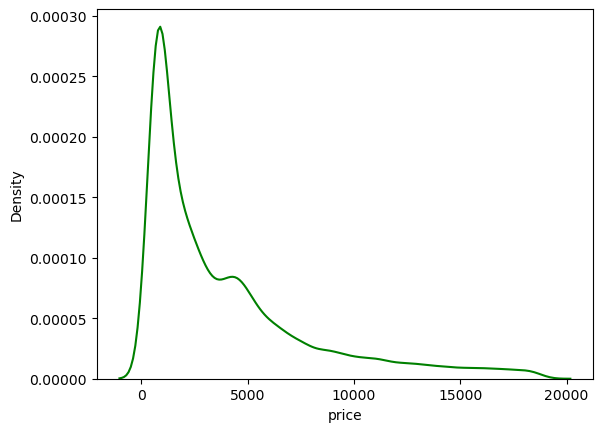

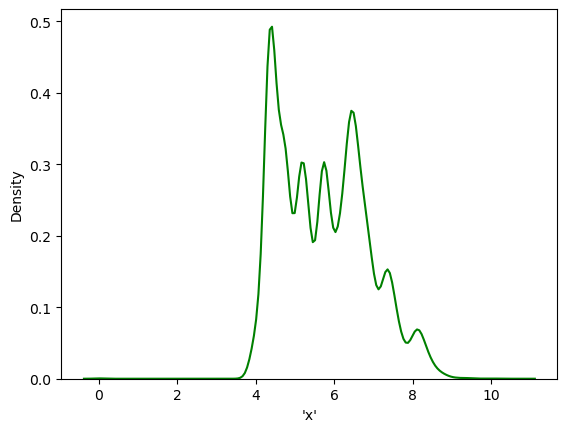

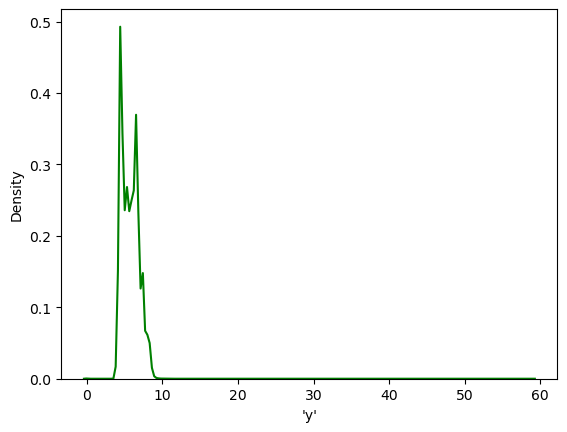

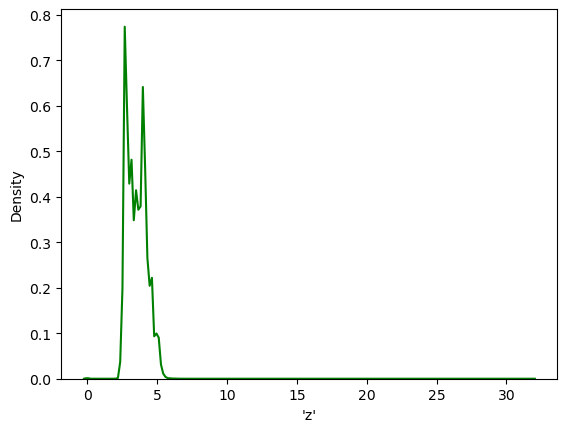

In [24]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i],color="GREEN")
        plt.show();

  ### HISTOGRAM

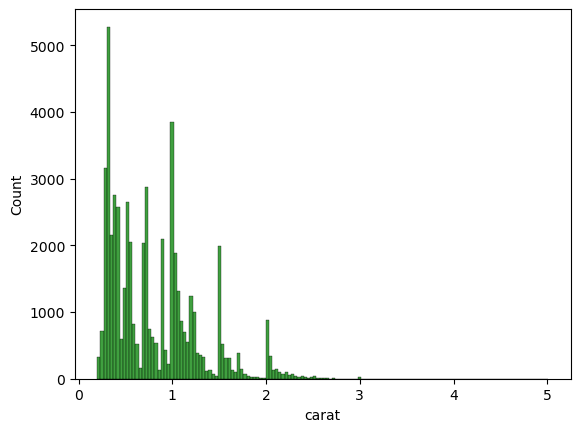

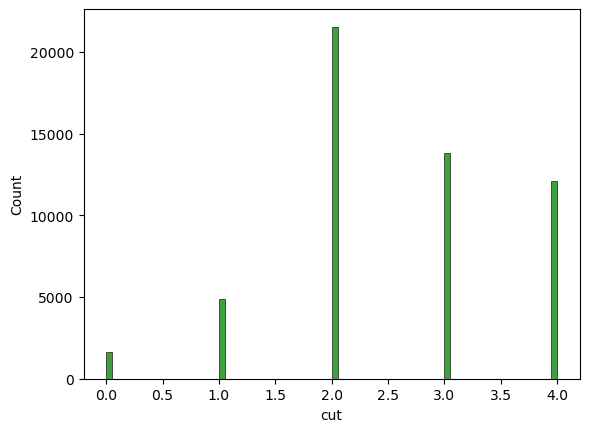

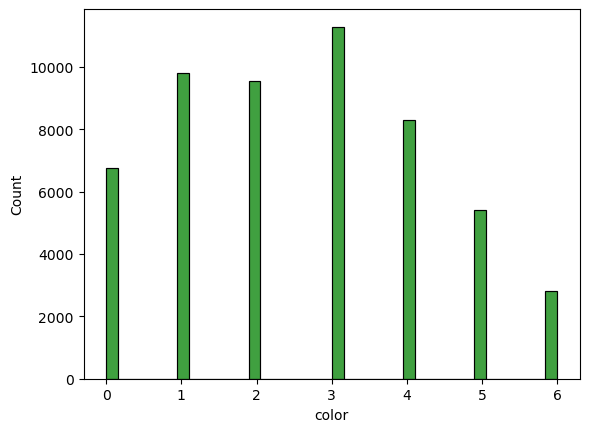

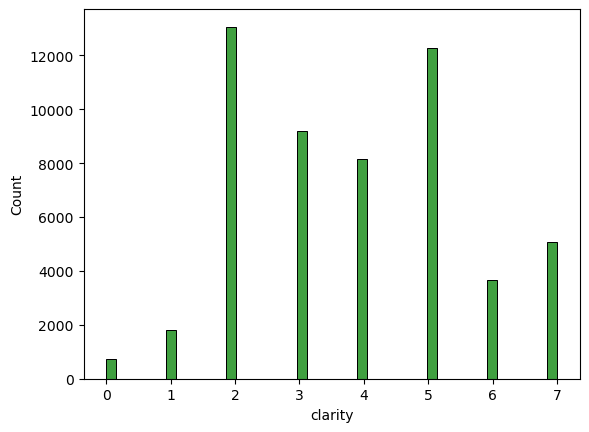

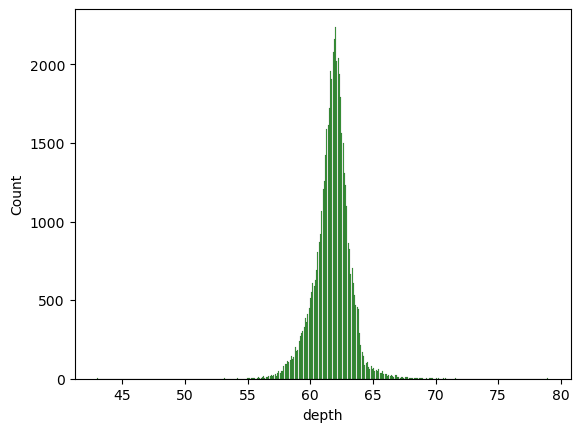

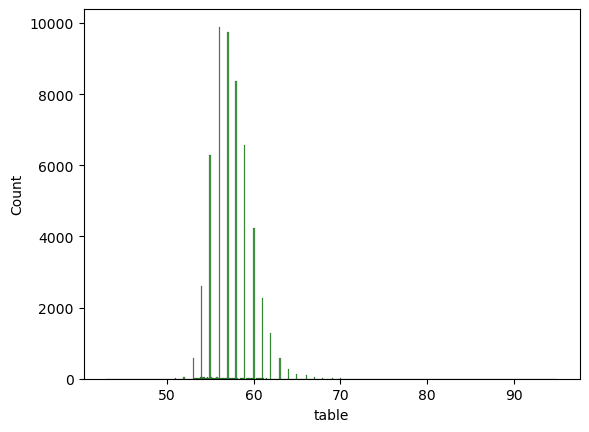

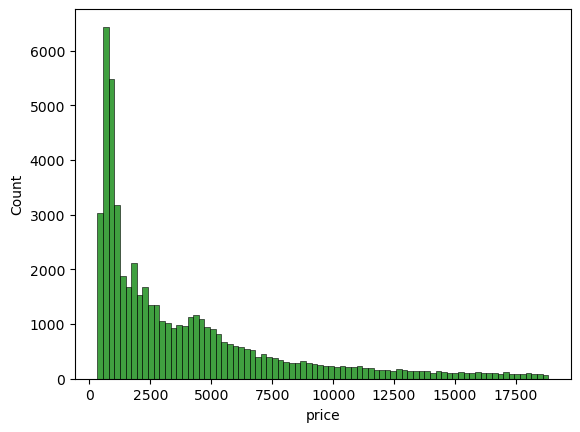

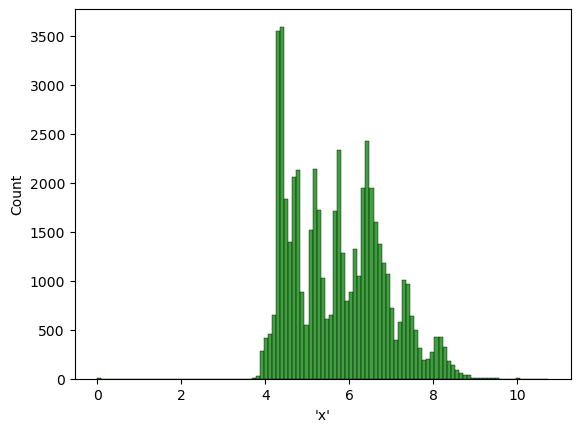

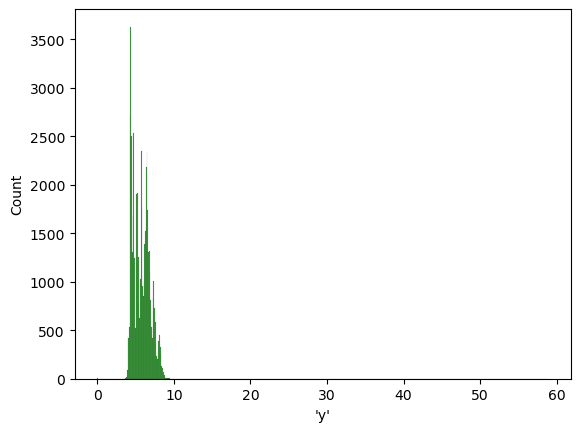

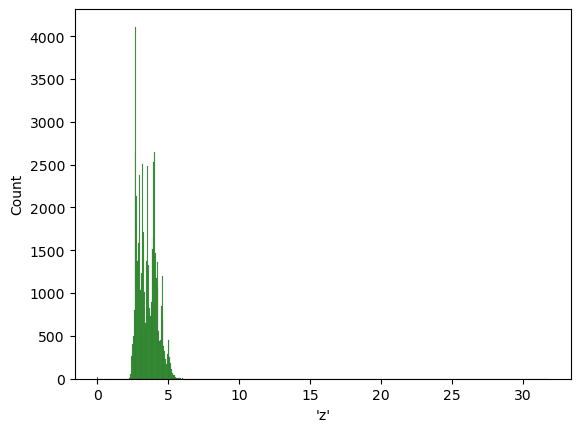

In [25]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i],color="GREEN")
        plt.show();

### HEATMAP


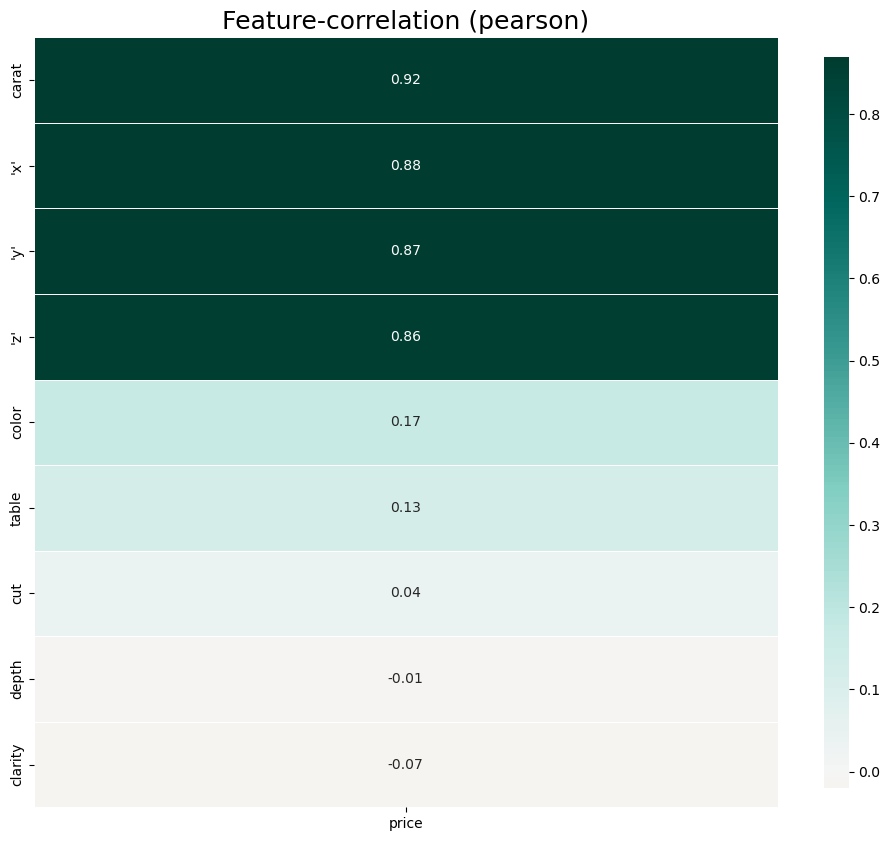

In [26]:
k.corr_plot(data=df,target="price");

In [27]:
k.clean_column_names(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


### boxplot

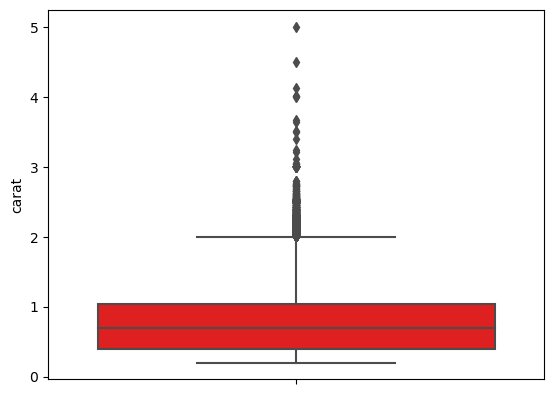

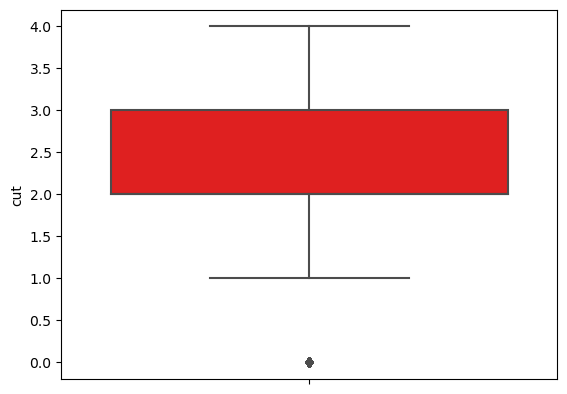

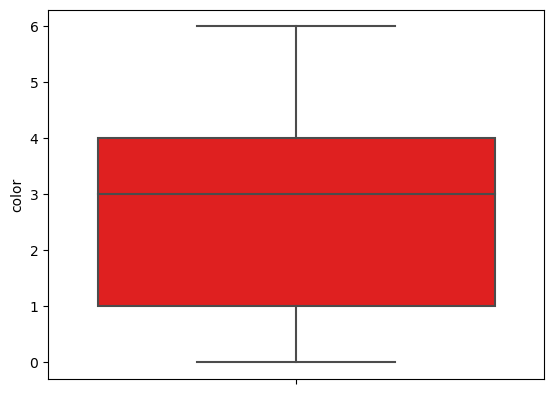

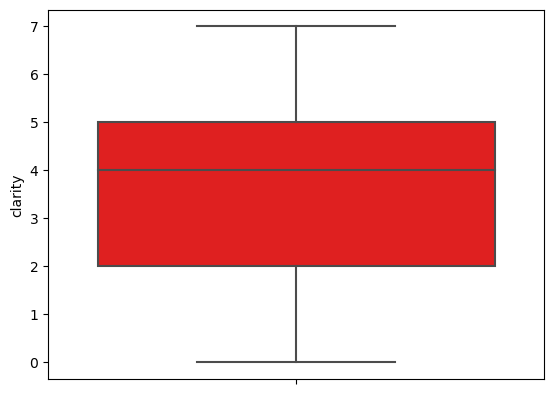

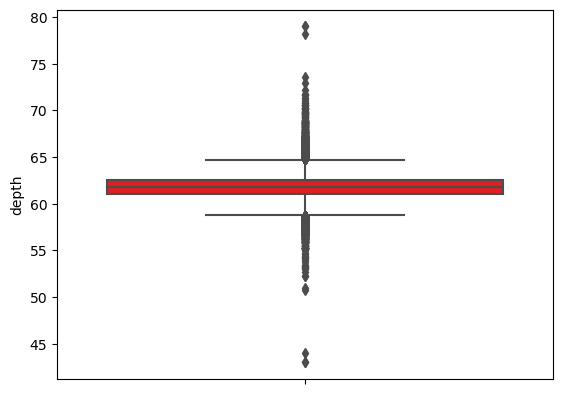

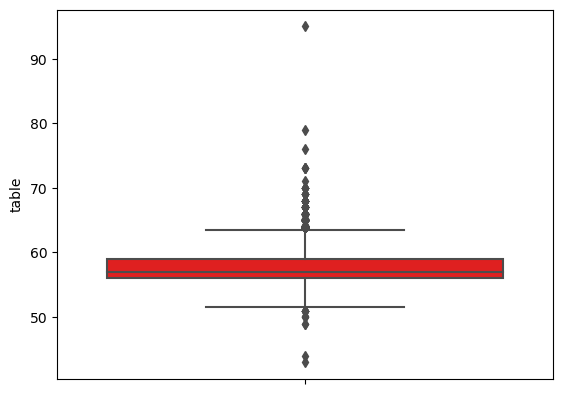

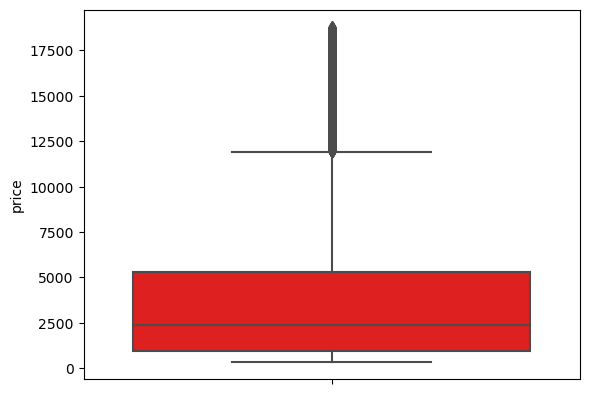

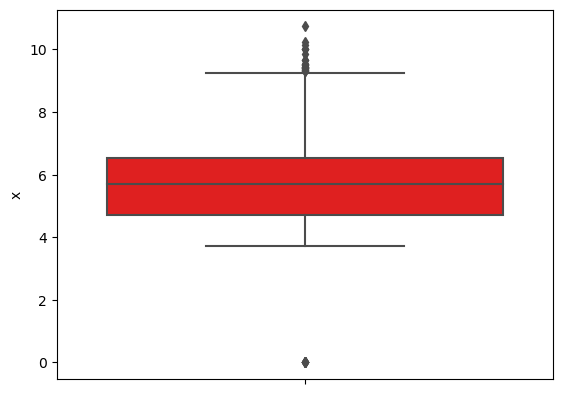

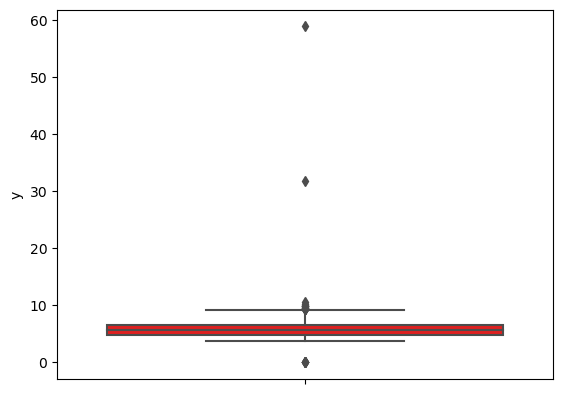

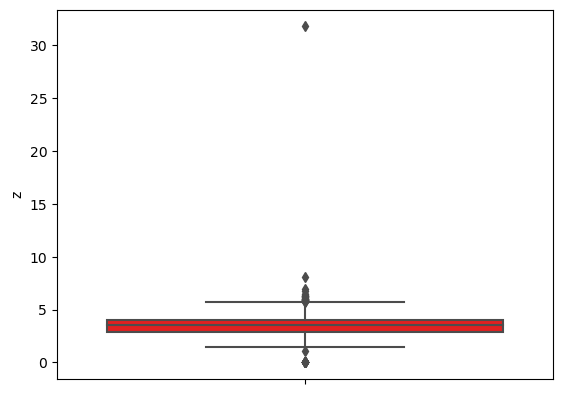

In [28]:
for i in df.columns:
    if df[i].dtype!="object":
            sns.boxplot(y=df[i],color="red")
            plt.show()
            

### cleaning the outliers

In [ ]:
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [ ]:
for column in df.columns:
    if df[column].dtype !="object":
        ul,ll=outlier(df[column])
        df[column]=np.where((df[column]>ul)|(df[column]<ll),np.nan,df[column])

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

### droping nan values

In [29]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [30]:
df.dropna(inplace=True)

### REGRESSION

In [31]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


In [32]:
x=df[["carat","cut","color","depth","table","x","y","z"]].values

In [33]:
y=df[["price"]].values

In [34]:
sc=StandardScaler()

In [35]:
x=sc.fit_transform(x)

### CROSS VALIDATION

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [37]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1325.7542285438606
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1327.5645246640504
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1325.8862763613884
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1657.9017630703886
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  1302.7238458277293
****************************************************************************************************


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
models={
    "linearregression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "decisiontreeregressor":DecisionTreeRegressor(),
    "randomforestregressor":RandomForestRegressor(random_state=0)
}

In [41]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with{}".format(name))
    training_score =model.score(x_train,y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse= mean_squared_error(y_test,model.predict(x_test))
    rmse= np.sqrt(mse)
    print("r2score: ",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("   "*105)

model trained withlinearregression
r2score:  87.31258323925692
training_score: 86.99014370978004
testing_score: 87.31258323925692
mae: 889.0677666178455
mse: 2011168.7487293205
rmse_test: 1418.1568138712025
                                                                                                                                                                                                                                                                                                                           
model trained withridge
r2score:  87.31220052551025
training_score: 86.99014018999156
testing_score: 87.31220052551025
mae: 889.2023013288721
mse: 2011229.4152890744
rmse_test: 1418.1782029382184
                                                                                                                                                                                                                                                                                         

### model training


In [42]:
model=RandomForestRegressor()

In [43]:
model.fit(x_train,y_train)

RandomForestRegressor()

 ### PRICE PREDICTION

In [44]:
y_pred = model.predict(x)

In [45]:
op=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)


### scatterplot

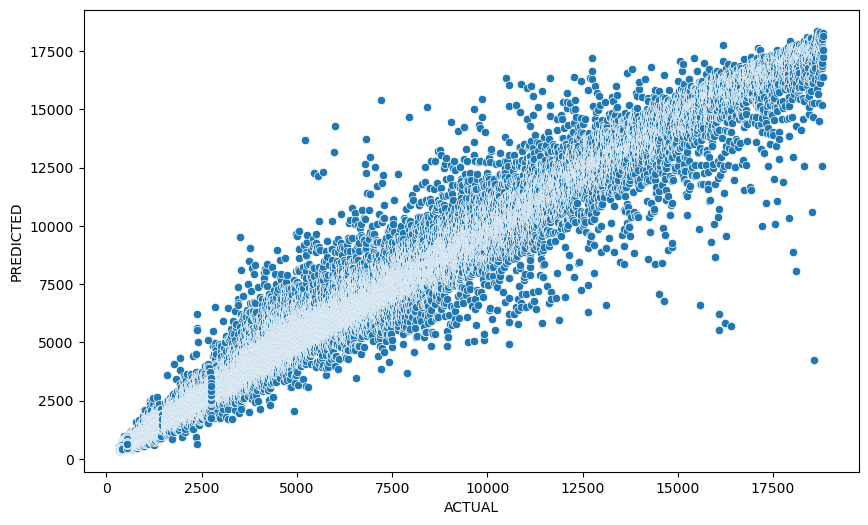

In [46]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

### LINE PLOT

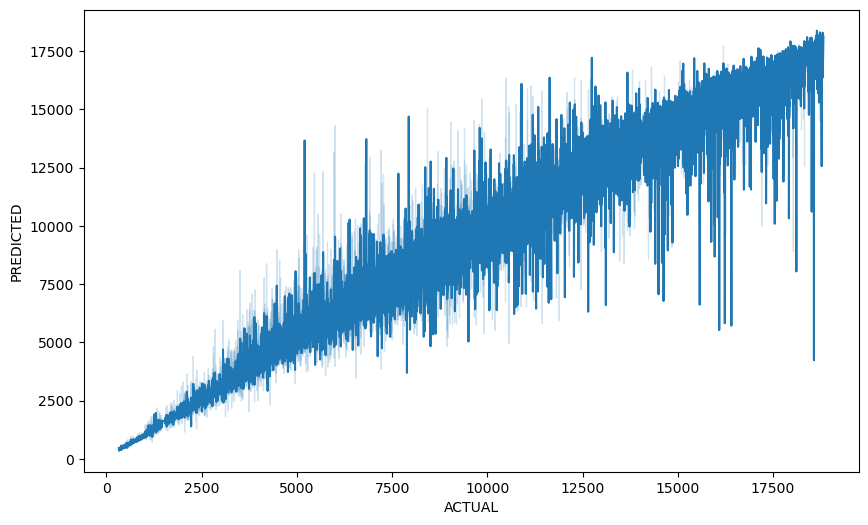

In [47]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

### CONCLUTION

###  
OUR PREDICTED VALUE IS  98% ACCURATE WITH ACTUAL VALUE BY USING  RANDOM FOREST REGRESSION